In [37]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset 

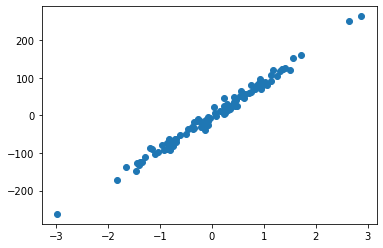

In [38]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y)

In [41]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [44]:
# matrice X
X = np.hstack((x,np.ones(x.shape)))
X

array([[ 0.56975603,  1.        ],
       [-0.77589334,  1.        ],
       [ 0.24899005,  1.        ],
       [-0.12734129,  1.        ],
       [-2.98408088,  1.        ],
       [-0.92657783,  1.        ],
       [-0.45926885,  1.        ],
       [ 0.425064  ,  1.        ],
       [-1.28035879,  1.        ],
       [ 1.13022893,  1.        ],
       [-0.3779768 ,  1.        ],
       [ 0.30790199,  1.        ],
       [-0.82942404,  1.        ],
       [ 1.06416736,  1.        ],
       [-0.2077026 ,  1.        ],
       [ 1.30689114,  1.        ],
       [ 0.7618139 ,  1.        ],
       [ 0.05052542,  1.        ],
       [-0.73992742,  1.        ],
       [-0.12728874,  1.        ],
       [ 0.62161268,  1.        ],
       [-0.14484955,  1.        ],
       [-0.13947295,  1.        ],
       [ 0.24323392,  1.        ],
       [-1.09980749,  1.        ],
       [-0.74642195,  1.        ],
       [ 1.34894979,  1.        ],
       [ 1.2450591 ,  1.        ],
       [-0.07068929,

In [47]:
theta = np.random.randn(2,1)
theta

array([[0.14988349],
       [1.3039705 ]])

# 2. Model

In [48]:
def model(X, theta):
    return X.dot(theta)

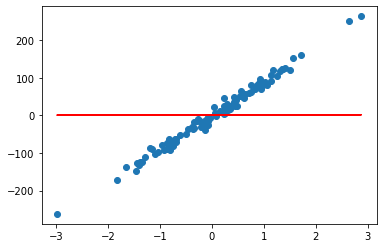

In [53]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c="r")

# 3. Cost Function

In [54]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [55]:
cost_function(X, y, theta)

3792.365361286793

# 4. Gradients and Gradient Descent

In [65]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [69]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

In [70]:
final_theta, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [71]:
final_theta

array([[90.37136793],
       [-1.54392021]])

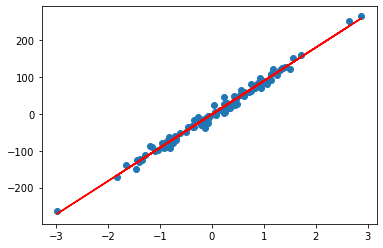

In [72]:
predictions = model(X, final_theta)
plt.scatter(x,y)
plt.plot(x, predictions, c='r')

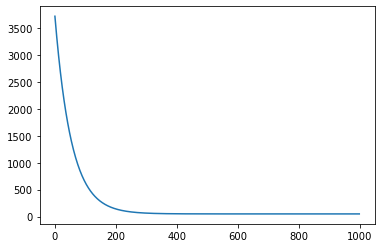

In [74]:
plt.plot(range(1000), cost_history)

In [75]:
def determination_coef(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [76]:
determination_coef(y, predictions)

0.9873442581449386